In [15]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [65]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [6]:
dataFrame=pd.read_csv("/home/hrugvedb/Desktop/hrugved/dataset/spam_email.csv")
df=dataFrame.copy()
df.head()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


In [8]:
df.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


In [10]:
df.isnull()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Email                0
Subject              0
Sender               0
Recipient            0
Date                 0
Time                 0
Attachments          0
Link Count           0
Word Count           0
Uppercase Count      0
Exclamation Count    0
Question Count       0
Dollar Count         0
Punctuation Count    0
HTML Tags Count      0
Spam Indicator       0
dtype: int64

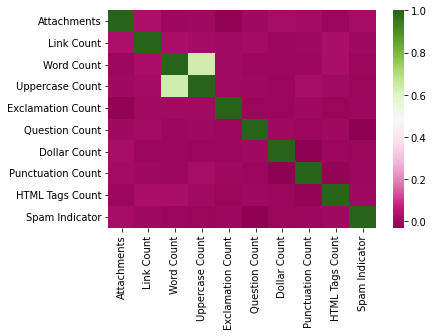

In [14]:
corr=df.corr()
dataplot=sn.heatmap(corr, cmap="PiYG")

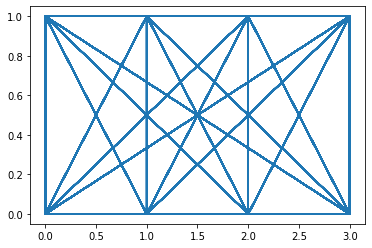

In [17]:
x=df['Attachments']
y=df['Spam Indicator']
plt.plot(x,y)

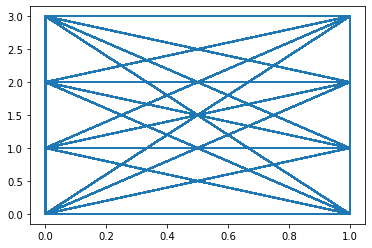

In [24]:
x=df['Spam Indicator']
y=df['Attachments']
plt.plot(x,y)

([<matplotlib.axis.XTick at 0x7f4a25464a58>,
 [Text(0, 0, ''), Text(0, 0, '')])

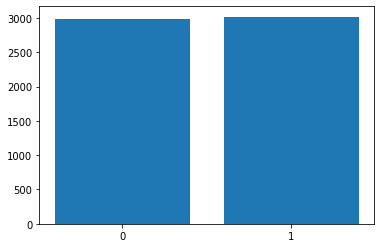

In [22]:
plt.bar(df['Spam Indicator'].unique(),df['Spam Indicator'].value_counts())
plt.xticks([0,1])

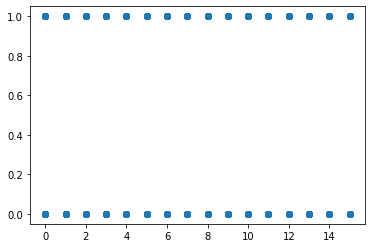

In [30]:
plt.scatter(df['Punctuation Count'],df['Spam Indicator'])

In [33]:
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4a13ae3780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4a13af6438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4a13ae3ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4a13b061d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4a13a96c18>],
 'means': []}

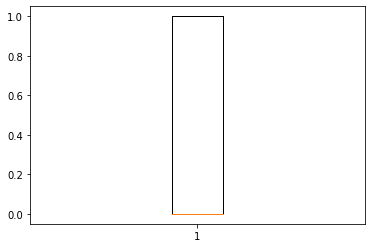

In [36]:
plt.boxplot(df[''])

In [42]:

df.drop(['HTML Tags Count'],axis=1)

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,cassidytaylor@example.com,Current team yet like realize American.,martinezangela@example.net,perkinsmatthew@example.org,10-04-2023,07:18,1,7,114,83,0,3,2,0,0
5996,lisatate@example.com,Also start certainly range great try others.,mckenzieerika@example.net,jeremy75@example.org,07-05-2023,19:45,1,5,19,10,0,0,1,7,0
5997,cassandravazquez@example.org,Matter issue win agent likely.,dlewis@example.org,cervanteskimberly@example.org,08-04-2023,18:49,2,10,52,45,5,3,0,10,0
5998,amoore@example.com,Again member father.,eperry@example.org,dana02@example.org,19-01-2023,14:00,3,2,178,76,0,1,2,11,1


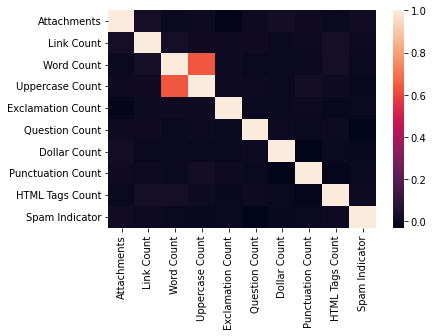

In [44]:
corr=df.corr()
dataplot=sn.heatmap(corr)

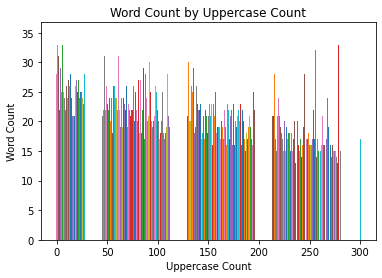

In [46]:
import matplotlib.pyplot as plt

# Get the unique values
unique_values = df['Uppercase Count'].unique()

# Get the counts of each unique value
counts = df['Word Count'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots()

# Loop through the unique values and plot the counts
for value, count in zip(unique_values, counts):
    ax.bar(value, count)

# Set the title and labels
ax.set_title('Word Count by Uppercase Count')
ax.set_xlabel('Uppercase Count')
ax.set_ylabel('Word Count')

# Show the plot
plt.show()


In [47]:
df.drop(['Time'],axis=1)

,Email,Subject,Sender,Recipient,Date,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,3,5,299,279,0,2,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,cassidytaylor@example.com,Current team yet like realize American.,martinezangela@example.net,perkinsmatthew@example.org,10-04-2023,1,7,114,83,0,3,2,0,5,0
5996,lisatate@example.com,Also start certainly range great try others.,mckenzieerika@example.net,jeremy75@example.org,07-05-2023,1,5,19,10,0,0,1,7,0,0
5997,cassandravazquez@example.org,Matter issue win agent likely.,dlewis@example.org,cervanteskimberly@example.org,08-04-2023,2,10,52,45,5,3,0,10,4,0
5998,amoore@example.com,Again member father.,eperry@example.org,dana02@example.org,19-01-2023,3,2,178,76,0,1,2,11,1,1


In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Attachments        6000 non-null   int64 
 3   Link Count         6000 non-null   int64 
 4   Word Count         6000 non-null   int64 
 5   Uppercase Count    6000 non-null   int64 
 6   Exclamation Count  6000 non-null   int64 
 7   Question Count     6000 non-null   int64 
 8   Dollar Count       6000 non-null   int64 
 9   Punctuation Count  6000 non-null   int64 
 10  HTML Tags Count    6000 non-null   int64 
 11  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 562.6+ KB


In [61]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Attachments        6000 non-null   int64 
 3   Link Count         6000 non-null   int64 
 4   Word Count         6000 non-null   int64 
 5   Uppercase Count    6000 non-null   int64 
 6   Exclamation Count  6000 non-null   int64 
 7   Question Count     6000 non-null   int64 
 8   Dollar Count       6000 non-null   int64 
 9   Punctuation Count  6000 non-null   int64 
 10  HTML Tags Count    6000 non-null   int64 
 11  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 562.6+ KB


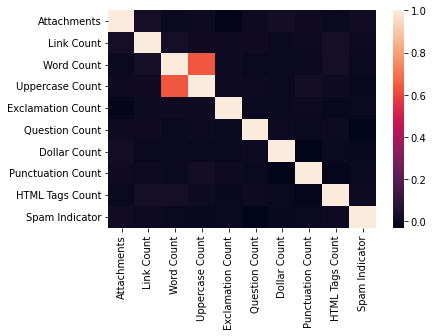

In [63]:
corr=df.corr()
dataplot=sn.heatmap(corr)

['y', 'b', 'g', 'r']


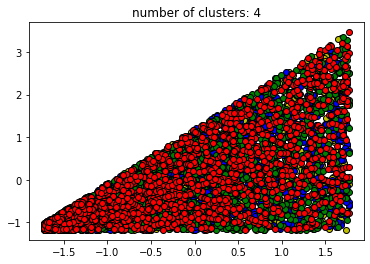

In [126]:
features = ['Word Count','Uppercase Count','Question Count']


scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


dbscan = DBSCAN(eps=0.5, min_samples=10)


dbscan.fit(df[features])


labels = dbscan.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = df[features][class_member_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [127]:

from sklearn.metrics import silhouette_score, adjusted_rand_score


n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
if n_clusters < 2:
    print("Not enough clusters to calculate scores.")
else:
    sc = silhouette_score(df[features], labels)
    print("Silhouette Coefficient:%0.2f" % sc)

    ari = adjusted_rand_score(df['cluster'], labels)
    print("Adjusted Rand Index: %0.2f" % ari)


Silhouette Coefficient:0.14
Adjusted Rand Index: 0.00


In [103]:
df.drop(['Subject'],axis=1,inplace=True)

In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Create a SelectKBest object
selector = SelectKBest(f_regression, k=1)

# Fit the selector to the data
selector.fit(df.drop('Spam Indicator', axis=1), df['Spam Indicator'])

# Get the index of the best feature
best_feature_index = selector.get_support().argmax()

# Print the name of the best feature
print(df.columns[best_feature_index])


Question Count


/home/hrugvedb/.local/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


array([[<AxesSubplot:title={'center':'Attachments'}>,
        <AxesSubplot:title={'center':'Link Count'}>,
        <AxesSubplot:title={'center':'Word Count'}>],
       [<AxesSubplot:title={'center':'Uppercase Count'}>,
        <AxesSubplot:title={'center':'Exclamation Count'}>,
        <AxesSubplot:title={'center':'Question Count'}>],
       [<AxesSubplot:title={'center':'Dollar Count'}>,
        <AxesSubplot:title={'center':'Punctuation Count'}>,
        <AxesSubplot:title={'center':'HTML Tags Count'}>],
       [<AxesSubplot:title={'center':'Spam Indicator'}>,
        <AxesSubplot:title={'center':'cluster'}>, <AxesSubplot:>]],
      dtype=object)

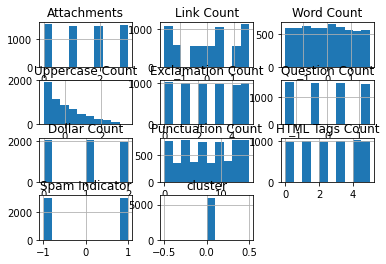

In [111]:
df.hist()